# Códigos que uso para hacer la actividad 1

In [1]:
import matplotlib.pyplot as plt
import eagleSqlTools as sql
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import pandas as pd

In [6]:
table_snap_28 = pd.read_csv('/home/ramiro/Facultad/Tesis/Datos/Actividad 1/prueba_galaxias_RefL0100N1504_snap_28.dat')
table_snap_28

,GalaxyID,Redshift,SnapNum,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,NSF_Mass,...,Stars_Oxygen,Stars_Metallicity,SF_Hydrogen,SF_Oxygen,SF_Metallicity,NSF_Hydrogen,NSF_Oxygen,NSF_Metallicity,StarFormationRate,InitialMassWeightedStellarAge
0,1,2.220446e-16,28,42,11.388981,80.659843,54.157326,5.515596e+10,0.0,0.000000e+00,...,0.012036,0.025114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.428815
1,13631,2.220446e-16,28,45,16.987013,79.780968,52.654659,5.262381e+10,0.0,6.069262e+06,...,0.012018,0.025388,0.000000,0.000000,0.000000,0.729755,0.006277,0.011251,0.000000,10.899063
2,21793,2.220446e-16,28,54,11.277282,81.034775,54.133808,4.000421e+10,0.0,0.000000e+00,...,0.011009,0.024019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.753275
3,23301,2.220446e-16,28,61,11.489024,80.556633,54.228474,4.212277e+10,0.0,0.000000e+00,...,0.015604,0.035451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.492470
4,24477,2.220446e-16,28,66,17.554474,80.003693,53.143673,2.611424e+10,0.0,0.000000e+00,...,0.007286,0.015599,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.445591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13295,13020299,2.220446e-16,28,0,65.704407,18.168629,62.296143,1.787582e+09,306697632.0,7.527834e+08,...,0.006848,0.015490,0.668347,0.015278,0.037084,0.736481,0.002886,0.006897,0.210713,7.340688
13296,13020727,2.220446e-16,28,0,49.874557,1.147930,13.364695,1.351767e+09,48176308.0,2.982188e+09,...,0.007303,0.016640,0.658874,0.017243,0.041394,0.745850,0.001155,0.002769,0.012530,8.132151
13297,13021024,2.220446e-16,28,0,55.386059,91.975830,70.975716,1.126520e+09,100908552.0,1.307544e+09,...,0.005861,0.013193,0.661381,0.016129,0.040401,0.747844,0.000723,0.001834,0.038583,9.140628
13298,13021428,2.220446e-16,28,0,74.801315,68.822510,99.491264,1.565284e+09,484164160.0,3.136910e+09,...,0.005781,0.012548,0.697841,0.010479,0.024758,0.747210,0.000981,0.002230,0.247548,6.186985


Entramos a la página de EAGLE y descargamos las simulaciones que queremos

Nos guardamos los archivos descargados

Cargamos las tablas descargadas

Armemos el histograma de log10(stellar mass), para ésto nos vamos a quedar sólo con partículas de estrella de 10^10 masas solares.

In [7]:
mask_stellarmass=(table_snap_28['Stars_Mass']>=1e10)

Nos construimos la variable x

In [8]:
var  = np.log10(table_snap_28['Stars_Mass'][mask_stellarmass])

In [9]:
xmin = np.min(var)
xmax = np.max(var)

Nos fijamos el mínimo y máximo valor en el array paraestablecer los límites del histograma

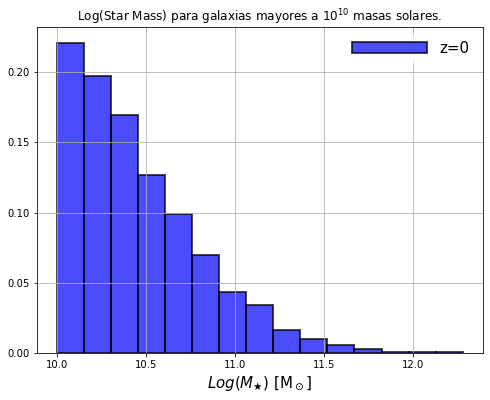

In [10]:
weights=np.ones_like(var)/float(len(var))
fig,ax=plt.subplots(figsize=(8,6))
ax.hist(var,bins=15,range=(xmin,xmax),histtype='bar',label='z=0',linestyle='-',
        color='b',linewidth=2,alpha=0.7,edgecolor='k',weights=weights)
plt.title('Log(Star Mass) para galaxias mayores a 'r'$10^{10}$ masas solares.')
plt.grid(True)
ax.set_xlabel(r'$Log(M_\bigstar) \ [\rm{M}_\odot]$', fontsize=15)
leg=ax.legend(loc='upper right',fontsize=15,edgecolor='w',handlelength=5)
# plt.savefig('Log(Star_Mass).png')
plt.show()

**Para el histograma de Log10(InitialMassWeightedStellarAge)**

In [12]:
mask_stellarmass=(table_snap_28['Stars_Mass']>=1e10)

In [13]:
var  = table_snap_28['InitialMassWeightedStellarAge'][mask_stellarmass]

In [14]:
xmin = np.min(var)
xmax = np.max(var)

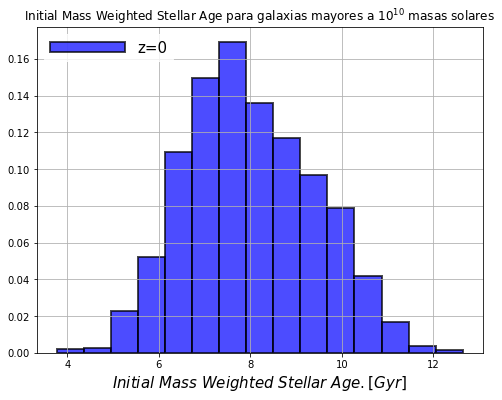

In [20]:
weights=np.ones_like(var)/float(len(var))
fig,ax=plt.subplots(figsize=(8,6))
ax.hist(var,bins=15,range=(xmin,xmax),histtype='bar',linestyle='-',
        color='b',linewidth=2,label='z=0',alpha=0.7,edgecolor='k',weights=weights)
plt.title('Initial Mass Weighted Stellar Age para galaxias mayores a 'r'$10^{10}$ masas solares')
plt.grid(True)
ax.set_xlabel(r'$Initial\ Mass\ Weighted\ Stellar\ Age.[Gyr]$', fontsize=15)
leg=ax.legend(loc='upper left',fontsize=15,edgecolor='w',handlelength=5)
# plt.savefig('/home/ramiro/Facultad/Tesis/Figuras/Actividad 1/InitialMassWeightedStellarAge.png')
plt.show()

InitialMassWeightedStellarAge: Mean age of stars, weighted by birth mass.
Es el promedio de la edad de las estrellas pesado por el peso incial en el momento del nacimiento de la estrella. Unidad Gyr(10^9 años)

**Para el histograma de (masa de star forming gas)/((masa de star forming gas)+(masa de star))**

Nos definimos algunas variables

In [38]:
mask_stellarmass=(table_snap_28['Stars_Mass']>=1e10)

In [39]:
M_Star  = table_snap_28['Stars_Mass'][mask_stellarmass]
M_SF_gas= table_snap_28['SF_Mass'][mask_stellarmass]

In [40]:
var1 = (M_SF_gas+M_Star)
var  = M_SF_gas/var1

xmin = np.min(var)
xmax = np.max(var)

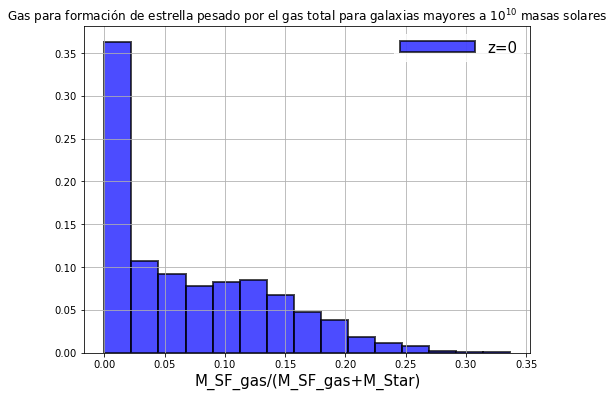

In [42]:
weights=np.ones_like(var)/float(len(var))
fig,ax=plt.subplots(figsize=(8,6))
ax.hist(var,bins=15,range=(xmin,xmax),histtype='bar',label='z=0',linestyle='-',
        color='b',linewidth=2,alpha=0.7,edgecolor='k', weights=weights)
plt.title('Gas para formación de estrella pesado por el gas total para galaxias mayores a 'r'$10^{10}$ masas solares')
plt.grid(True)
ax.set_xlabel(r'M_{SFgas}/(M_{SFgas}+M_{Star})', fontsize=15)
leg = ax.legend(loc='upper right',fontsize=15,edgecolor='w',handlelength=5)
# plt.savefig('Relación(Msf-Ms).png')

plt.show()

**Para Specific Star Formation Rate**

In [16]:
mask_stellarmass=(table_snap_28['Stars_Mass']>=1e10)

In [17]:
SFR   = table_snap_28['StarFormationRate'][mask_stellarmass]
M_Star= table_snap_28['Stars_Mass'][mask_stellarmass]
var   = np.log10(SFR/M_Star)

xmin = np.min(var)
xmax = np.max(var)


<ipython-input-17-ac40c33695e0>:3: RuntimeWarning: divide by zero encountered in log10
  var   = np.log10(SFR/M_Star)


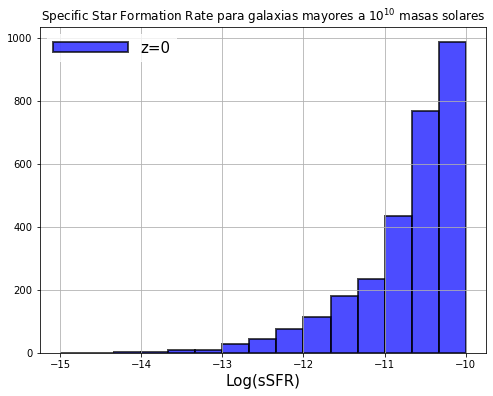

In [18]:
fig,ax=plt.subplots(figsize=(8,6))
ax.hist(var,bins=15,range=(-15,-10),histtype='bar',label='z=0',linestyle='-',
        color='b',linewidth=2,alpha=0.7,edgecolor='k')
plt.title('Specific Star Formation Rate para galaxias mayores a 'r'$10^{10}$ masas solares')
plt.grid(True)
ax.set_xlabel(r'Log(sSFR)', fontsize=15)
leg = ax.legend(loc='upper left',fontsize=15,edgecolor='w',handlelength=5)
#plt.savefig('Log(sSFR).png')

plt.show()

En éste caso está el inconveniente que si el STR es cero, el logaritmo tiende a menos infinito. 

In [46]:
p = np.arange(0,len(SFR),1)
r = 0
for i in p:
    if SFR[i]<=0.0:
        r+=1
    else: 
        r+=0

print('Número de galáxias que tienden a menos infinito:',r) 
print('De un total de:',len(SFR))
print('En porcentaje:',r/(len(SFR)))

Número de galáxias que tienden a menos infinito: 545
De un total de: 3638
En porcentaje: 0.1498075865860363


**Por último el histograma de 12+log(O/H)**

In [47]:
SF_O = table_snap_28['SF_Oxygen'][mask_stellarmass]
SF_H = table_snap_28['SF_Hydrogen'][mask_stellarmass]
SF_M = table_snap_28['SF_Mass'][mask_stellarmass]

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

var   = 12 + np.log10(M_O_SF/(16*M_H_SF))

xmin = np.min(var)
xmax = np.max(var)

<ipython-input-47-e02a7ea0c23f>:8: RuntimeWarning: invalid value encountered in true_divide
  var   = 12 + np.log10(M_O_SF/(16*M_H_SF))


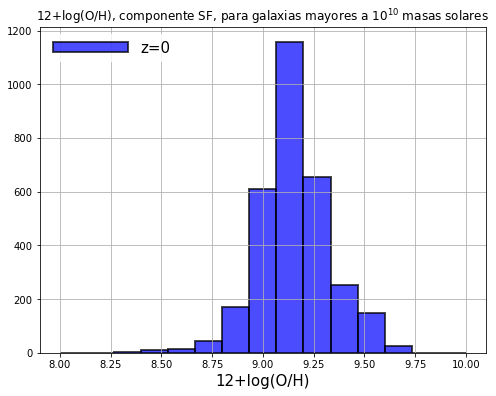

In [49]:
fig,ax=plt.subplots(figsize=(8,6))
ax.hist(var,bins=15,range=(8,10),histtype='bar',label='z=0',linestyle='-',
        color='b',linewidth=2,alpha=0.7,edgecolor='k')
plt.title('12+log(O/H), componente SF, para galaxias mayores a 'r'$10^{10}$ masas solares')
plt.grid(True)
ax.set_xlabel(r'12+log(O/H)', fontsize=15)
leg = ax.legend(loc='upper left',fontsize=15,edgecolor='w',handlelength=5)
# plt.savefig('Log(OH).png')

plt.show()

**Hacemos todos los gráficos anteriores pero para redshift z=0,1,2,3. Descargo los snaps correspondientes**

<ipython-input-6-20ba793dc858>:23: RuntimeWarning: invalid value encountered in true_divide
  var   = 12 + np.log10(M_O_SF/(16*M_H_SF))
<ipython-input-6-20ba793dc858>:23: RuntimeWarning: invalid value encountered in true_divide
  var   = 12 + np.log10(M_O_SF/(16*M_H_SF))
<ipython-input-6-20ba793dc858>:23: RuntimeWarning: invalid value encountered in true_divide
  var   = 12 + np.log10(M_O_SF/(16*M_H_SF))
<ipython-input-6-20ba793dc858>:23: RuntimeWarning: invalid value encountered in true_divide
  var   = 12 + np.log10(M_O_SF/(16*M_H_SF))


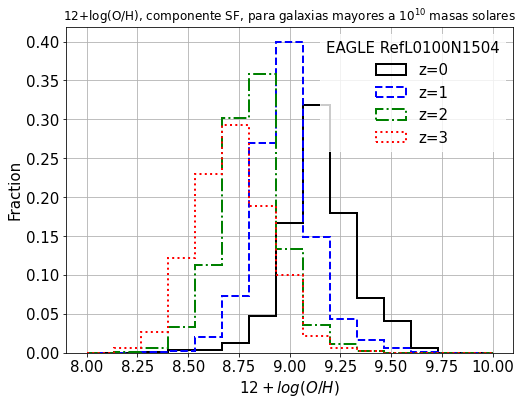

In [6]:
data_folder='/home/ramiro/Facultad/Datos/Python/Actividad 1/'
fig,ax=plt.subplots(figsize=(8,6))
snap_list=[28,19,15,12]
redshift_list=[0,1,2,3]

color=['k','b','g','r']    # colores para cada z
line=['-','--','-.',':']   # tipo de linea para cada z

for snap,redshift,lc,ls in zip(snap_list,redshift_list,color,line):   
    data_file='prueba_galaxias_'+simu+'_snap_'+str(snap)+'.dat'
    data_path=data_folder+data_file
    table=ascii.read(data_path,comment='#',format='fast_csv') 

    mask_stellarmass=(table['Stars_Mass']>=1e10)     #Mascara para seleccionar masas adecuadas
    
    SF_O = table['SF_Oxygen'][mask_stellarmass]
    SF_H = table['SF_Hydrogen'][mask_stellarmass]
    SF_M = table['SF_Mass'][mask_stellarmass]

    M_O_SF = SF_O*SF_M
    M_H_SF = SF_H*SF_M

    var   = 12 + np.log10(M_O_SF/(16*M_H_SF))
    
    weights=np.ones_like(var)/float(len(var))

    ax.hist(var,bins=15,range=(8,10),histtype='step',label='z='+str(redshift),
            linestyle=ls,color=lc,linewidth=2,weights=weights)

ax.set_xlabel(r'$12+log(O/H)$', fontsize=15)
ax.set_ylabel('Fraction', fontsize=15)
ax.tick_params(axis='both',labelsize=15)
plt.title('12+log(O/H), componente SF, para galaxias mayores a 'r'$10^{10}$ masas solares')

leg=plt.legend(loc='upper right',edgecolor='w',fontsize=15)
leg.set_title('EAGLE RefL0100N1504', prop = {'size':15})
plt.grid(True)
# plt.savefig('Log(OH)-(z=0,1,2,3).png')

Para la masa estelar

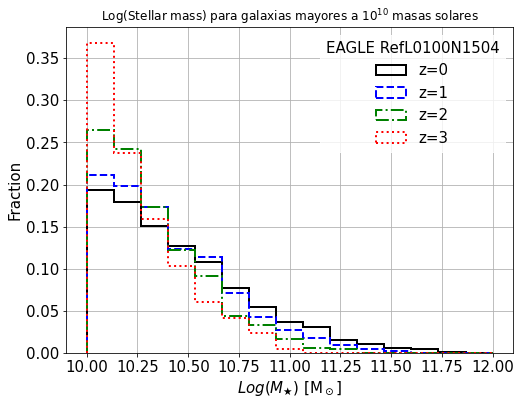

In [55]:
data_folder='/home/ramiro/Facultad/Tesis/Datos/Actividad 1/'
fig,ax=plt.subplots(figsize=(8,6))
snap_list=[28,19,15,12]
redshift_list=[0,1,2,3]

color=['k','b','g','r']    # colores para cada z
line=['-','--','-.',':']   # tipo de linea para cada z

for snap,redshift,lc,ls in zip(snap_list,redshift_list,color,line):   
    data_file='prueba_galaxias_'+simu+'_snap_'+str(snap)+'.dat'
    data_path=data_folder+data_file
    table=ascii.read(data_path,comment='#',format='fast_csv') 

    mask_stellarmass = (table['Stars_Mass']>=1e10)     #Mascara para seleccionar masas adecuadas
    
    var = np.log10(table['Stars_Mass'][mask_stellarmass])    # Variable a usar. 
    
    weights=np.ones_like(var)/float(len(var))

    ax.hist(var,bins=15,range=(10,12),histtype='step',label='z='+str(redshift),
            linestyle=ls,color=lc,linewidth=2,weights=weights)

ax.set_xlabel(r'$Log(M_\bigstar) \ [\rm{M}_\odot]$', fontsize=15)
ax.set_ylabel('Fraction', fontsize=15)
ax.tick_params(axis='both',labelsize=15)
plt.title('Log(Stellar mass) para galaxias mayores a 'r'$10^{10}$ masas solares')

leg=plt.legend(loc='upper right',edgecolor='w',fontsize=15)
leg.set_title('EAGLE RefL0100N1504', prop = {'size':15})
plt.grid(True)
# plt.savefig('Log(Stars_Mass)-(z=0,1,2,3).png')

Relacion entre masa de star forming y la total(materia bariónica)

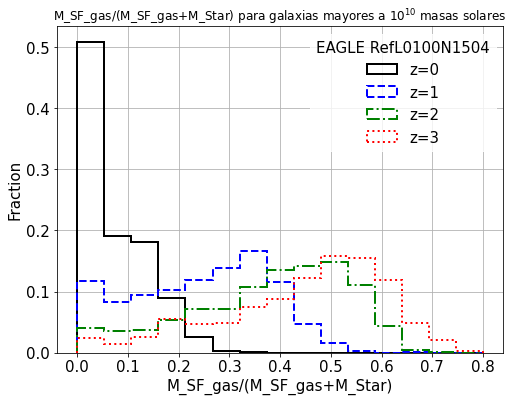

In [7]:
data_folder='/home/ramiro/Facultad/Tesis/Python/Actividad 1/'
fig,ax=plt.subplots(figsize=(8,6))
snap_list=[28,19,15,12]
redshift_list=[0,1,2,3]

color=['k','b','g','r']    
line=['-','--','-.',':']   

for snap,redshift,lc,ls in zip(snap_list,redshift_list,color,line):   
    data_file='prueba_galaxias_'+simu+'_snap_'+str(snap)+'.dat'
    data_path=data_folder+data_file
    table=ascii.read(data_path,comment='#',format='fast_csv') 

    mask_stellarmass = (table['Stars_Mass']>=1e10)     
    
    M_Star  = table['Stars_Mass'][mask_stellarmass]
    M_SF_gas= table['SF_Mass'][mask_stellarmass]
    
    
    
    var1 = (M_SF_gas+M_Star)
    var  = M_SF_gas/var1    
    
    weights=np.ones_like(var)/float(len(var))

    ax.hist(var,bins=15,range=(0,0.8),histtype='step',label='z='+str(redshift),
            linestyle=ls,color=lc,linewidth=2,weights=weights)

ax.set_xlabel(r'M_SF_gas/(M_SF_gas+M_Star)', fontsize=15)
ax.set_ylabel('Fraction', fontsize=15)
ax.tick_params(axis='both',labelsize=15)
plt.title('M_SF_gas/(M_SF_gas+M_Star) para galaxias mayores a 'r'$10^{10}$ masas solares')

leg=plt.legend(loc='upper right',edgecolor='w',fontsize=15)
leg.set_title('EAGLE RefL0100N1504', prop = {'size':15})
plt.grid(True)
# plt.savefig('Relación(Msf-Ms)-(z=0,1,2,3).png')

Y por último para el specific star formation mass

<ipython-input-11-81048ce9e63d>:19: RuntimeWarning: divide by zero encountered in log10
  var   = np.log10(SFR/0.02)
<ipython-input-11-81048ce9e63d>:19: RuntimeWarning: divide by zero encountered in log10
  var   = np.log10(SFR/0.02)
<ipython-input-11-81048ce9e63d>:19: RuntimeWarning: divide by zero encountered in log10
  var   = np.log10(SFR/0.02)
<ipython-input-11-81048ce9e63d>:19: RuntimeWarning: divide by zero encountered in log10
  var   = np.log10(SFR/0.02)


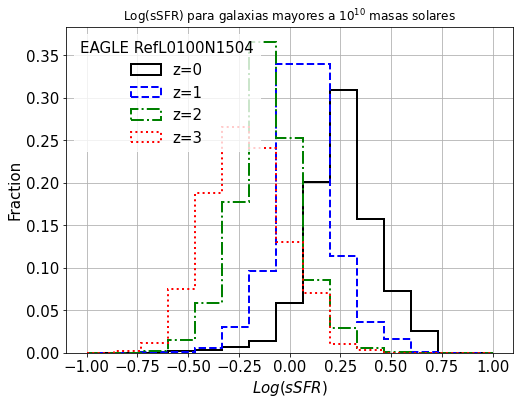

In [11]:
data_folder='/home/ramiro/Facultad/Tesis/Python/Actividad 1/'
fig,ax=plt.subplots(figsize=(8,6))
snap_list=[28,19,15,12]
redshift_list=[0,1,2,3]

color=['k','b','g','r']    
line=['-','--','-.',':']   

for snap,redshift,lc,ls in zip(snap_list,redshift_list,color,line):   
    data_file='prueba_galaxias_'+simu+'_snap_'+str(snap)+'.dat'
    data_path=data_folder+data_file
    table=ascii.read(data_path,comment='#',format='fast_csv') 

    mask_stellarmass = (table['Stars_Mass']>=1e10)     
    
    SFR   = table['SF_Metallicity'][mask_stellarmass]
    #M_Star= table['Stars_Mass'][mask_stellarmass]
    
    var   = np.log10(SFR/0.02) 
    
    weights=np.ones_like(var)/float(len(var))

    ax.hist(var,bins=15,range=(-1,1),histtype='step',label='z='+str(redshift),
            linestyle=ls,color=lc,linewidth=2,weights=weights)

ax.set_xlabel(r'$Log(sSFR)$', fontsize=15)
ax.set_ylabel('Fraction', fontsize=15)
ax.tick_params(axis='both',labelsize=15)
plt.title('Log(sSFR) para galaxias mayores a 'r'$10^{10}$ masas solares')

leg=plt.legend(loc='upper left',edgecolor='w',fontsize=15)
leg.set_title('EAGLE RefL0100N1504', prop = {'size':15})
plt.grid(True)
#plt.savefig('Log(sSFR)-(z=0,1,2,3).png')